In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# from modules.preprocess_text import preprocess_text

# removes chained assignment warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [54]:
path = '../data/casaData/'
df_numListings = pd.read_csv('trainListings_num.csv', index_col=0)
df_matchedListings = pd.read_csv(path + 'trainMatchedListings.csv')

In [55]:
df_matchedListings = df_matchedListings.reset_index()
df_matchedListings.columns = ['id1', 'id2','match']

In [56]:
orig_id = set(df_numListings['id_clean'].tolist())

In [57]:
df_matchedListings_clean = df_matchedListings.loc[(df_matchedListings['id2'].isin(orig_id)) & (df_matchedListings['id1'].isin(orig_id))]

In [58]:
df_matchedListings_clean['id_list'] = list(zip(df_matchedListings_clean['id1'], df_matchedListings_clean['id2']))
df_matchedListings_clean['id_list'] = df_matchedListings_clean['id_list'].apply(sorted)
df_matchedListings_clean['id_list'] = df_matchedListings_clean['id_list'].apply(lambda x: ''.join(str(n) for n in x))
df_matchedListings_clean = df_matchedListings_clean.drop_duplicates(subset='id_list')

In [12]:
df_numListings.head()

,id_clean,sourceId,source_size,groupName,price_filled,price_cats,price_log,bedrooms_filled_median,bathrooms_filled_median,bedroom_cats,bathroom_cats,area_totalLiving_filled,area_totalLiving_cats,plotArea_filled,plotArea_cats
0,1,1.0,v_large,house,26500000.0,v_expensive,17.093,10.0,16.0,6+,6+,4000.0,v_large,820000.0,v_large
1,2,9.0,v_large,house,26500000.0,v_expensive,17.093,10.0,12.0,6+,6+,3000.0,v_large,1200000.0,v_large
2,3,14.0,v_large,house,26500000.0,v_expensive,17.093,10.0,12.0,6+,6+,3000.0,v_large,2743.0,v_large
3,4,37.0,v_large,house,26500000.0,v_expensive,17.093,10.0,12.0,6+,6+,3000.0,v_large,1200000.0,v_large
4,5,85.0,v_large,house,26500000.0,v_expensive,17.093,10.0,12.0,6+,6+,517.0,v_large,1200000.0,v_large


In [14]:
df_numListings['sourceId'] = df_numListings['sourceId'].astype(object)

In [15]:
df_numListings.dtypes

id_clean                     int64
sourceId                    object
source_size                 object
groupName                   object
price_filled               float64
price_cats                  object
price_log                  float64
bedrooms_filled_median     float64
bathrooms_filled_median    float64
bedroom_cats                object
bathroom_cats               object
area_totalLiving_filled    float64
area_totalLiving_cats       object
plotArea_filled            float64
plotArea_cats               object
dtype: object

In [16]:
df_numListings.columns

Index(['id_clean', 'sourceId', 'source_size', 'groupName', 'price_filled',
       'price_cats', 'price_log', 'bedrooms_filled_median',
       'bathrooms_filled_median', 'bedroom_cats', 'bathroom_cats',
       'area_totalLiving_filled', 'area_totalLiving_cats', 'plotArea_filled',
       'plotArea_cats'],
      dtype='object')

In [17]:
df_test1 = df_numListings[['id_clean', 'source_size', 'groupName', 'price_log', 'bedrooms_filled_median',
       'bathrooms_filled_median', 'area_totalLiving_filled', 'plotArea_filled']]

In [128]:
df_test2 = df_numListings[['id_clean', 'groupName', 'price_log', 'bedrooms_filled_median',
       'bathrooms_filled_median', 'area_totalLiving_filled', 'plotArea_filled']]

In [18]:
df_test1.head()

,id_clean,source_size,groupName,price_log,bedrooms_filled_median,bathrooms_filled_median,area_totalLiving_filled,plotArea_filled
0,1,v_large,house,17.093,10.0,16.0,4000.0,820000.0
1,2,v_large,house,17.093,10.0,12.0,3000.0,1200000.0
2,3,v_large,house,17.093,10.0,12.0,3000.0,2743.0
3,4,v_large,house,17.093,10.0,12.0,3000.0,1200000.0
4,5,v_large,house,17.093,10.0,12.0,517.0,1200000.0


In [19]:
df_test1.dtypes

id_clean                     int64
source_size                 object
groupName                   object
price_log                  float64
bedrooms_filled_median     float64
bathrooms_filled_median    float64
area_totalLiving_filled    float64
plotArea_filled            float64
dtype: object

In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
scaler = StandardScaler()
ohE = OneHotEncoder()
ordE = OrdinalEncoder()


In [27]:
# column transformer to process columns separately 
from sklearn.compose import ColumnTransformer

In [42]:
df_test1.head()

,id_clean,source_size,groupName,price_log,bedrooms_filled_median,bathrooms_filled_median,area_totalLiving_filled,plotArea_filled
0,1,v_large,house,17.093,10.0,16.0,4000.0,820000.0
1,2,v_large,house,17.093,10.0,12.0,3000.0,1200000.0
2,3,v_large,house,17.093,10.0,12.0,3000.0,2743.0
3,4,v_large,house,17.093,10.0,12.0,3000.0,1200000.0
4,5,v_large,house,17.093,10.0,12.0,517.0,1200000.0


In [43]:
df_test1.dtypes

id_clean                     int64
source_size                 object
groupName                   object
price_log                  float64
bedrooms_filled_median     float64
bathrooms_filled_median    float64
area_totalLiving_filled    float64
plotArea_filled            float64
dtype: object

In [130]:
num_cols = list(df_test2.select_dtypes(['float64']))
cat_cols = ['groupName']
# ord_cols =['source_size']

In [131]:
transformers = [
    ('num', StandardScaler(), num_cols), # pass list 
    ('cat', OneHotEncoder(), cat_cols)
    # ('ord', OrdinalEncoder(),ord_cols)
]

In [132]:
transformer = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [135]:
df_test_forMerge = pd.DataFrame(transformer.fit_transform(df_test2))

In [136]:
df_test_forMerge.iloc[:,-1].name

10

In [137]:
last_col = df_test_forMerge.iloc[:,-1].name
df_test_forMerge = df_test_forMerge.rename(columns={last_col:'id_clean'})

In [138]:
df_pairedListings = df_matchedListings_clean.merge(df_test_forMerge, left_on='id1', right_on='id_clean', how='left').merge(df_test_forMerge, left_on='id2', right_on='id_clean', how='left')

In [139]:
df_pairedListings.head()

,id1,id2,match,id_list,0_x,1_x,2_x,3_x,4_x,5_x,...,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,id_clean_y
0,1,2,1,12,3.486,0.523877,4.025123,1.362696,3.764378,0.0,...,0.523877,2.787416,0.990272,5.535444,0.0,1.0,0.0,0.0,0.0,2.0
1,1,3,1,13,3.486,0.523877,4.025123,1.362696,3.764378,0.0,...,0.523877,2.787416,0.990272,-0.044613,0.0,1.0,0.0,0.0,0.0,3.0
2,1,4,1,14,3.486,0.523877,4.025123,1.362696,3.764378,0.0,...,0.523877,2.787416,0.990272,5.535444,0.0,1.0,0.0,0.0,0.0,4.0
3,1,5,1,15,3.486,0.523877,4.025123,1.362696,3.764378,0.0,...,0.523877,2.787416,0.065541,5.535444,0.0,1.0,0.0,0.0,0.0,5.0
4,1,6,1,16,3.486,0.523877,4.025123,1.362696,3.764378,0.0,...,0.523877,4.025123,1.362696,3.764378,0.0,1.0,0.0,0.0,0.0,6.0


In [140]:
df_pairedListings = df_pairedListings.drop(columns=['id1', 'id2', 'id_list', 'id_clean_x', 'id_clean_y'])

In [141]:
X = df_pairedListings.drop(columns='match')
y = df_pairedListings['match']

In [142]:
X.columns

Index(['0_x', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x',
       '0_y', '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y', '9_y'],
      dtype='object')

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=15)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [145]:
logR = LogisticRegression(max_iter=1000)

In [146]:
logR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [147]:
gnb = GaussianNB()

In [148]:
gnb.fit(X_train, y_train)

GaussianNB()

In [149]:
y_pred = logR.predict(X_test)

In [196]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score, precision_score, recall_score

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    259539
           1       0.68      0.05      0.10     29840

    accuracy                           0.90    289379
   macro avg       0.79      0.52      0.52    289379
weighted avg       0.88      0.90      0.86    289379



In [152]:
cm = confusion_matrix(y_test, y_pred)

In [153]:
print(cm)

[[258813    726]
 [ 28293   1547]]


In [154]:
gnb_pred = gnb.predict(X_test)

In [155]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94    259539
           1       0.44      0.14      0.22     29840

    accuracy                           0.89    289379
   macro avg       0.68      0.56      0.58    289379
weighted avg       0.86      0.89      0.87    289379



In [156]:
cm = confusion_matrix(y_test, gnb_pred)

In [157]:
print(cm)

[[254190   5349]
 [ 25583   4257]]


In [158]:
from xgboost import XGBClassifier
import xgboost as xgb

In [159]:
xgbC = XGBClassifier(
    max_depth=10,
    learning_rate=0.1,
    colsample_bytree=0.6
)

In [160]:
xgbC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [161]:
xg_pred = xgbC.predict(X_test)

In [164]:
xg_pred_train = xgbC.predict(X_train)

In [165]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    259539
           1       0.94      0.32      0.48     29840

    accuracy                           0.93    289379
   macro avg       0.93      0.66      0.72    289379
weighted avg       0.93      0.93      0.91    289379



In [166]:
print(classification_report(y_train, xg_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96   1038157
           1       0.96      0.34      0.50    119359

    accuracy                           0.93   1157516
   macro avg       0.94      0.67      0.73   1157516
weighted avg       0.93      0.93      0.92   1157516



Text(24.0, 0.5, 'actual')

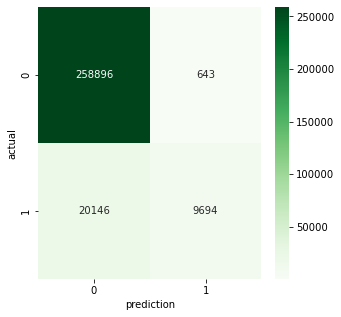

In [175]:
cm_xg = confusion_matrix(y_test, xg_pred)
sns.heatmap(cm_xg, annot=True, cmap='Greens', fmt='.10g')
plt.xlabel('prediction')
plt.ylabel('actual')

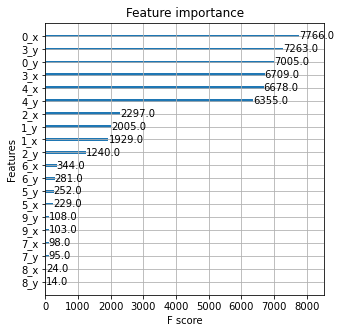

In [177]:
xgb.plot_importance(xgbC)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [182]:
xg_pred_prob = xgbC.predict_proba(X_test)

In [183]:
xg_pred_prob = xg_pred_prob[:,1]

In [178]:
precision, recall, thresholds = precision_recall_curve(y_test, xg_pred)

In [184]:
fscore = (2* precision * recall) / (precision + recall)

In [187]:
ix_bestF = np.argmax(fscore)

In [188]:
fscore[ix_bestF]

0.4825646514174776

In [ ]:
# test f score after tuning thresholds 

In [189]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [199]:
thresholds = [0.2, 0.4, 0.6, 0.8]

In [200]:
scores = [recall_score(y_test, to_labels(xg_pred_prob, t)) for t in thresholds]

In [201]:
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.200, F-Score=0.61468


In [202]:
print(classification_report(y_test, to_labels(xg_pred_prob, 0.2)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    259539
           1       0.62      0.61      0.62     29840

    accuracy                           0.92    289379
   macro avg       0.79      0.79      0.79    289379
weighted avg       0.92      0.92      0.92    289379



In [204]:
cm = confusion_matrix(y_test, to_labels(xg_pred_prob, 0.2))

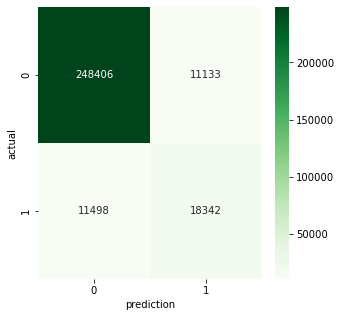

In [208]:
sns.heatmap(cm, annot=True, cmap='Greens', fmt='.10g')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()